In [1]:
fin = open("sentences.txt",encoding="utf8") 
#fin = open("sentences3.txt")                           #smaller text file available for testing
#fin = open("sentences-no-errors.txt")
lines = fin.readlines()
#print (lines)                                          #prints out the list lines

In [2]:
from textblob import TextBlob as tb                     #imports textblob, a python library for processing textual data,  as tb
from textblob.exceptions import NotTranslated           #imports exception to recognise sentences that are not translated
from difflib import SequenceMatcher                     #imports function sequence matcher
from time import time                                   #imports time library allowing the run time of programme to be calculated

def similar(a,b):                                       #this function returns a degree of similarity, 1 is highest value and means a perfect match
    return SequenceMatcher(None, a, b).ratio()

#setting up and initialising variables to store the number of perfect matches
perfect_matches_irish = 0
perfect_matches_german = 0
perfect_matches_french = 0
perfect_matches_spanish = 0
perfect_matches_igbo = 0
perfect_matches_russian = 0
perfect_matches_chinese = 0
perfect_matches_italian = 0
#setting up and initialising variables to store the number of sentences translated
no_sent_translated_irish = 0
no_sent_translated_german = 0
no_sent_translated_french = 0
no_sent_translated_spanish = 0
no_sent_translated_igbo = 0
no_sent_translated_russian = 0
no_sent_translated_chinese = 0
no_sent_translated_italian = 0
#setting up and intitalising variables for summing the 'degrees of similarity' for each language
sum_degree_sim_ga = 0
sum_degree_sim_de = 0
sum_degree_sim_fr = 0
sum_degree_sim_sp = 0
sum_degree_sim_ig= 0
sum_degree_sim_ru = 0
sum_degree_sim_ch = 0
sum_degree_sim_it = 0
#number of sentences altogether in the document
no_of_sentences = 0
#starting the clock to time the algorithm run time, time() returns the current time as tp1
tp1 = time()


for l in lines:                                         #add in [:10] to test
    no_of_sentences += 1
    newsentences = l.strip('0123456789')                #strips all the numbers from the sentences
    newsentences = newsentences.strip()                 #strips whitespace
    if "’" in newsentences:
        newsentences = newsentences.replace("’","'")    #replaces apostrophes
    se = newsentences                                   #each line of text document is an english string
    s1 = tb(se)                                         #string becomes a textblob object which allows for translation
    
#Gaeilge
    try:
        sgTB = s1.translate(to = 'ga')                  #takes english sentence translates to Gaeilge
        seTB = sgTB.translate(to = 'en')                #takes translated sentence and translates back to English
        degree_sim_ga = similar(se,seTB)                #tests degree of similarity returning a value 0 < 1
        sum_degree_sim_ga = sum_degree_sim_ga + degree_sim_ga   #adding up the degrees of similarity
        if degree_sim_ga == 1.0:                        #testing if there was a perfect round trip translation
            perfect_matches_irish = perfect_matches_irish + 1  #increments the perfect matches variable for Gaeilge
        no_sent_translated_irish += 1                   #counts the number of sentences translated in Gaeilge
    except NotTranslated:                               #deals with exception where sentence was not translated
        print ("Problem sentence for Gaeilge is...", se) #prints out the problem sentence
    
#German - code for all languages below is same as Gaeilge above.
    try:
        sdeTB = s1.translate(to = 'de')
        seTB = sdeTB.translate(to = 'en')
        degree_sim_de = similar(se,seTB)
        sum_degree_sim_de = sum_degree_sim_de + degree_sim_de 
        if degree_sim_de == 1.0:
            perfect_matches_german = perfect_matches_german + 1
        no_sent_translated_german += 1
    except NotTranslated:
        print ("Problem sentence for German is...", se)

#French
    try:
        sfrTB = s1.translate(to = 'fr')
        seTB = sfrTB.translate(to = 'en')
        degree_sim_fr = similar(se,seTB)
        sum_degree_sim_fr = sum_degree_sim_fr + degree_sim_fr 
        if degree_sim_fr == 1.0:
            perfect_matches_french = perfect_matches_french + 1
        no_sent_translated_french += 1
    except NotTranslated:
        print ("Problem sentence for French is...", se)

#Spanish
    try:
        sesTB = s1.translate(to = 'es')
        seTB = sesTB.translate(to = 'en')
        degree_sim_sp = similar(se,seTB)
        sum_degree_sim_sp = sum_degree_sim_sp + degree_sim_sp 
        if degree_sim_sp == 1.0:
            perfect_matches_spanish = perfect_matches_spanish + 1
        no_sent_translated_spanish += 1
    except NotTranslated:
        print ("Problem sentence for Spanish is...", se)
        
#Igbo
    try:
        sigTB = s1.translate(to = 'ig')
        seTB = sigTB.translate(to = 'en')
        degree_sim_ig = similar(se,seTB)
        sum_degree_sim_ig = sum_degree_sim_ig + degree_sim_ig 
        if degree_sim_ig == 1.0:
            perfect_matches_igbo = perfect_matches_igbo + 1
        no_sent_translated_igbo += 1
    except NotTranslated:
        print ("Problem sentence for Igbo is...", se)
    
#Russian
    try:
        sruTB = s1.translate(to = 'ru')
        seTB = sruTB.translate(to = 'en')
        degree_sim_ru = similar(se,seTB)
        sum_degree_sim_ru = sum_degree_sim_ru + degree_sim_ru 
        if degree_sim_ru == 1.0:
            perfect_matches_russian = perfect_matches_russian + 1
        no_sent_translated_russian += 1
    except NotTranslated:
        print ("Problem sentence for Russian is...", se)
    
#Chinese
    try:
        scTB = s1.translate(to = 'zh-TW')
        seTB = scTB.translate(to = 'en')
        degree_sim_ch = similar(se,seTB)
        sum_degree_sim_ch = sum_degree_sim_ch + degree_sim_ch
        if degree_sim_ch == 1.0:
            perfect_matches_chinese = perfect_matches_chinese + 1
        no_sent_translated_chinese += 1
    except NotTranslated:
        print ("Problem sentence for Chinese is...", se)
    
#Italian
    try:
        siTB = s1.translate(to = 'it')
        seTB = siTB.translate(to = 'en')
        degree_sim_it = similar(se,seTB)
        sum_degree_sim_it = sum_degree_sim_it + degree_sim_it 
        if degree_sim_it == 1.0:
            perfect_matches_italian = perfect_matches_italian + 1
        no_sent_translated_italian += 1
    except NotTranslated:
        print ("Problem sentence for Italian is...", se)

print ("**********************************")
print ("There are", no_of_sentences, "sentences in the document")
print ("**********************************")

#calculating and printing out the number of perfect round trip matches and the number of sentences that were not translated
print (perfect_matches_irish, "perfect matches in Gaeilge out of", no_sent_translated_irish, "sentences successfully translated")
print ((no_of_sentences - no_sent_translated_irish), "sentences not translated \n")
print (perfect_matches_german, "perfect matches in German out of", no_sent_translated_german, "sentences successfully translated")
print ((no_of_sentences - no_sent_translated_german), "sentences not translated \n")
print (perfect_matches_french, "perfect matches in French out of", no_sent_translated_french, "sentences successfully translated")
print ((no_of_sentences - no_sent_translated_french), "sentences not translated \n")
print (perfect_matches_spanish, "perfect matches in Spanish out of", no_sent_translated_spanish, "sentences successfully translated")
print ((no_of_sentences - no_sent_translated_spanish), "sentences not translated \n")
print (perfect_matches_igbo, "perfect matches in Igbo out of", no_sent_translated_igbo, "sentences successfully translated")
print ((no_of_sentences - no_sent_translated_igbo), "sentences not translated \n")
print (perfect_matches_russian, "perfect matches in Russian out of", no_sent_translated_russian, "sentences successfully translated")
print ((no_of_sentences - no_sent_translated_russian), "sentences not translated \n")
print (perfect_matches_chinese, "perfect matches in Chinese out of", no_sent_translated_chinese, "sentences successfully translated")
print ((no_of_sentences-no_sent_translated_chinese), "sentences not translated \n")
print (perfect_matches_italian, "perfect matches in Italian out of", no_sent_translated_italian, "sentences successfully translated")
print ((no_of_sentences-no_sent_translated_italian), "sentences not translated")
    
print ("**************************************")

#calculating the rate of perfect matches
percent_irish = (perfect_matches_irish/no_sent_translated_irish)*100
percent_german = (perfect_matches_german/no_sent_translated_german)*100
percent_french = (perfect_matches_french/no_sent_translated_french)*100
percent_spanish = (perfect_matches_spanish/no_sent_translated_spanish)*100
percent_igbo = (perfect_matches_igbo/no_sent_translated_igbo)*100
percent_russian = (perfect_matches_russian/no_sent_translated_russian)*100
percent_chinese = (perfect_matches_chinese/no_sent_translated_chinese)*100
percent_italian = (perfect_matches_italian/no_sent_translated_italian)*100

print ("% of perfect matches Gaeilge =", percent_irish)
print ("% of perfect matches German =", percent_german)
print ("% of perfect matches French =", percent_french)
print ("% of perfect matches Spanish =", percent_spanish)
print ("% of perfect matches Igbo =", percent_igbo)
print ("% of perfect matches Russian =", percent_russian)
print ("% of perfect matches Chinese =", percent_chinese)
print ("% of perfect matches Italian =", percent_italian)

print ("**************************************")

#calculating the average degree of similarity for each language
deg_sim_av_ga = sum_degree_sim_ga/no_sent_translated_irish
deg_sim_av_de = sum_degree_sim_de/no_sent_translated_german
deg_sim_av_fr = sum_degree_sim_fr/no_sent_translated_french
deg_sim_av_sp = sum_degree_sim_sp/no_sent_translated_spanish
deg_sim_av_ig = sum_degree_sim_ig/no_sent_translated_igbo
deg_sim_av_ru = sum_degree_sim_ru/no_sent_translated_russian
deg_sim_av_ch = sum_degree_sim_ch/no_sent_translated_chinese
deg_sim_av_it = sum_degree_sim_it/no_sent_translated_italian

print ("Degree of Similarity Average for Gaeilge =", deg_sim_av_ga)
print ("Degree of Similarity Average for German =", deg_sim_av_de)
print ("Degree of Similarity Average for French =", deg_sim_av_fr)
print ("Degree of Similarity Average for Spanish =", deg_sim_av_sp)
print ("Degree of Similarity Average for Igbo =",deg_sim_av_ig)
print ("Degree of Similarity Average for Russian =",deg_sim_av_ru)
print ("Degree of Similarity Average for Chinese =",deg_sim_av_ch)
print ("Degree of Similarity Average for Italian =", deg_sim_av_it)

print ("**************************************")

print("Overall Time: %6.3f" % (time()-tp1), "seconds")                 #returns current time and then calculates run time
print("Overall Time: %6.3f" % ((time()-tp1)/60), "minutes")


Problem sentence for Igbo is... It is difficult.
Problem sentence for Igbo is... I'm sure.
Problem sentence for Igbo is... Get in! Get on!
Problem sentence for Igbo is... I put on my slippers.
Problem sentence for Igbo is... How beautiful he is!
Problem sentence for Igbo is... Look at me!
Problem sentence for Igbo is... Hold on!
Problem sentence for Gaeilge is... Good gracious!
Problem sentence for Gaeilge is... Ridiculous!
Problem sentence for French is... Ridiculous!
Problem sentence for Igbo is... Excuse me
Problem sentence for Gaeilge is... Damn
Problem sentence for Gaeilge is... OK
Problem sentence for German is... OK
Problem sentence for Italian is... OK
Problem sentence for French is... Have a nice weekend
Problem sentence for Igbo is... So did I
**********************************
There are 342 sentences in the document
**********************************
119 perfect matches in Gaeilge out of 338 sentences successfully translated
4 sentences not translated 

130 perfect matches i

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
s = pd.Series([perfect_matches_irish, perfect_matches_german, perfect_matches_french, perfect_matches_spanish, perfect_matches_igbo, perfect_matches_russian, perfect_matches_chinese, perfect_matches_italian],
              index = ['Gaeilge', 'German', 'French', 'Spanish', 'Igbo', 'Russian', 'Chinese', 'Italian'])
s_percent = pd.Series([percent_irish, percent_german, percent_french, percent_spanish, percent_igbo, percent_russian, percent_chinese, percent_italian],
                      index = ['Gaeilge', 'German', 'French', 'Spanish', 'Igbo', 'Russian', 'Chinese', 'Italian'])
s_deg_sim = pd.Series([deg_sim_av_ga, deg_sim_av_de, deg_sim_av_fr, deg_sim_av_sp, deg_sim_av_ig, deg_sim_av_ru, deg_sim_av_ch, deg_sim_av_it],
                      index = ['Gaeilge', 'German', 'French', 'Spanish', 'Igbo', 'Russian', 'Chinese', 'Italian'])

In [4]:
s

Gaeilge    119
German     130
French     124
Spanish    150
Igbo        78
Russian    107
Chinese     74
Italian    130
dtype: int64

In [5]:
s_percent

Gaeilge    35.207101
German     38.123167
French     36.470588
Spanish    43.859649
Igbo       23.423423
Russian    31.286550
Chinese    21.637427
Italian    38.123167
dtype: float64

In [6]:
s_deg_sim

Gaeilge    0.852649
German     0.879297
French     0.866402
Spanish    0.873047
Igbo       0.785825
Russian    0.835148
Chinese    0.814725
Italian    0.870658
dtype: float64

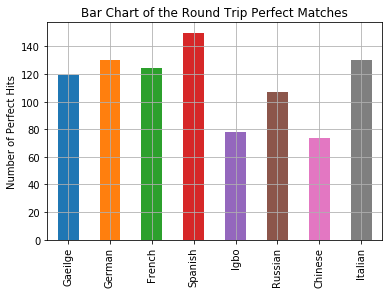

In [7]:
chart = s.plot.bar(title = 'Bar Chart of the Round Trip Perfect Matches')
chart.set(ylabel = 'Number of Perfect Hits')
chart.grid()

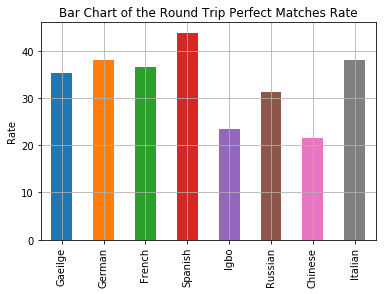

In [8]:
chart = s_percent.plot.bar(title = 'Bar Chart of the Round Trip Perfect Matches Rate')
chart.set(ylabel = 'Rate')
chart.grid()

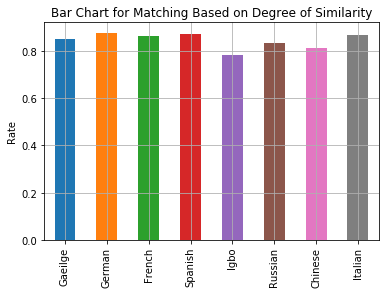

In [9]:
chart = s_deg_sim.plot.bar(title = 'Bar Chart for Matching Based on Degree of Similarity')
chart.set(ylabel = 'Rate')
chart.grid()

In [10]:
import pandas as pd

Translate_index=['GA', 'DE', 'FR', 'ES', 'IG', 'RU', 'ZH-TW', 'IT']
translate1 = pd.DataFrame({'No of perfect translations': [perfect_matches_irish, perfect_matches_german, perfect_matches_french, perfect_matches_spanish, perfect_matches_igbo, perfect_matches_russian, perfect_matches_chinese, perfect_matches_italian],
                           'Percentage':[percent_irish, percent_german, percent_french, percent_spanish, percent_igbo, percent_russian, percent_chinese, percent_italian],
                           'No of sentences tested':[no_sent_translated_irish, no_sent_translated_german, no_sent_translated_french, no_sent_translated_spanish, no_sent_translated_igbo, no_sent_translated_russian, no_sent_translated_chinese, no_sent_translated_italian],
                           'Average degree of similarity':[deg_sim_av_ga,deg_sim_av_de,deg_sim_av_fr,deg_sim_av_sp,deg_sim_av_ig,deg_sim_av_ru,deg_sim_av_ch,deg_sim_av_it]},index = Translate_index)
translate1

,Average degree of similarity,No of perfect translations,No of sentences tested,Percentage
GA,0.852649,119,338,35.207101
DE,0.879297,130,341,38.123167
FR,0.866402,124,340,36.470588
ES,0.873047,150,342,43.859649
IG,0.785825,78,333,23.423423
RU,0.835148,107,342,31.286550
ZH-TW,0.814725,74,342,21.637427
IT,0.870658,130,341,38.123167
